In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
nltk.download("stopwords")

pd.set_option('display.max_colwidth', -1)

In [12]:
s = lambda x: 'https://www.joinef.com/actions/EF/portfolio/filter?page={}&sort=asc'.format(x)

In [59]:
def get_cohort_data(url_func, n=10):
    res = []
    for i in range(1, n):
        url = url_func(i)
        try:
            json = requests.get(url, allow_redirects=True).json()['result']
            res += json
        except Exception:
            print('{} out of range'.format(i))
    return pd.DataFrame(res)

In [60]:
cohort_data = get_cohort_data(s)

In [64]:
cohort_data.shape

(100, 11)

In [71]:
cohort_data.to_csv('cohort_data.csv')

In [100]:
cohort_data.head(10)

,cohort,founderImage,founders,id,logo,name,projectDescription,projectLocation,projectStatus,sector,website
0,"{'label': 'EFSG2 (Singapore)', 'value': 'efsg2Singapore', 'selected': True}",https://s3-eu-west-1.amazonaws.com/ef-website-production/assets/_w1024/EFSG1.png,"[{'col1': 'Yasaman Nematbakhsh', 'founderName': 'Yasaman Nematbakhsh'}, {'col1': 'Data Ng', 'founderName': 'Data Ng'}]",1682,https://s3-eu-west-1.amazonaws.com/ef-website-production/assets/_square1024/42Lab.png,42Lab,"<p><strong>42LAB</strong> is the first modular, portable and affordable biotech laboratory for students. With Science, Technology, Engineering and Mathematics (STEM) education becoming required in OECD countries, most schools struggle to introduce biotechnology to their students due to high equipment cost and troublesome experiment preparation. 42LAB solves this problem by providing a portable modular biotech equipment for students to conduct experiments as well as a companion app which serves as an electronic manual for students and a management tool for teachers. Our vision is to bring biotech experience to every student like what Raspberry pi does for computer science.<br /><span class=""m_-3051852255652193813gmail-im""></span></p><p>\n</p><p><strong><br /></strong></p><p><strong>Dr. Yasaman Nematbakhsh</strong> (CEO) is an expert in novel biomedical engineering fields such as microfluidics and biodesign with nearly 10 years of experience in biology and engineering. She has won numerous scholarships and awards for her outstanding work in her PhD at National University of Singapore and had been a crucial member of 3 startups. </p><p>\n</p><p><strong><br /></strong></p><p><strong>Dr. Data Ng </strong>(CTO) is a hardware expert with a PhD in physics from Hong Kong University. As a director of a secondary school and court member of a university in Hong Kong, he has extensive network with schools and knows educational system inside out.</p>","{'label': 'Singapore', 'value': 'singapore', 'selected': True}","{'label': 'Active', 'value': 'active', 'selected': True}","{'label': 'Education', 'value': 'education', 'selected': True}",https://42lab.io/
1,"{'label': 'EF5 (London)', 'value': 'ef5London', 'selected': True}",https://s3-eu-west-1.amazonaws.com/ef-website-production/assets/_w1024/accelerated-dynamics.JPG,"[{'col1': 'Mantas Gribulis', 'founderName': 'Mantas Gribulis'}, {'col1': 'Umar Javed Wani', 'founderName': 'Umar Javed Wani'}]",151,https://s3-eu-west-1.amazonaws.com/ef-website-production/assets/Portfolio-Logos/_square1024/ef-alumni-accelerateddynamics-a.png,Accelerated Dynamics,"<p><strong>Accelerated Dynamics</strong> use machine learning, planning and multi-agent technologies, to transform drones, autonomous cars, satellite systems, and IoT devices into AI controllable assets which no longer require human operators. Our aim is to ease and promote the use of collaborative robots (aerial, ground or underwater) for business to enable the 4th Industrial Revolution.</p>\n<p><strong><br /></strong></p>\n<p><strong>Mantas Gribulis</strong> is a Robotics Engineer with a Masters degree in Robotics and Artificial Intelligence from KCL. His areas of expertise are Artificial Intelligence, Scheduling and Planning and Robot Operating System. His Master’s thesis at KCL, titled, “Intelligent Planning for Unmanned Aerial Vehicle Systems” integrated cutting edge A.I. planning techniques into Robot Operating System to simulate fully autonomous UAV behavior in mission critical scenarios. <br /></p>\n<p><strong><br /></strong></p>\n<p><strong>Umar Javed Wani</strong> has a Masters degree in Robotics, Systems and Control from the highly prestigious ETH Zurich. He has a bachelors degree in Mechatronics Engineering. Umar has worked with some of the top researchers in the field of Robotics and Artificial Intelligence, such as Prof. Rolf Pfiefer and Prof. Fumiya Iida, during his stay at ETH Zurich and has authored research papers on topics such as autonomous wheelchair

In [125]:
ais = ['ml', 'ai', 'artificial intelligence', 'machine learning']
phds = ['phd', 'doctor']
big_company = ['google', 'deepmind', 'microsoft', 'facebook', 'linkedin', 'amazon']
good_university = ['stanford', 'harvard', 'oxford', 'mit', 'cambridge', 'imperial']

In [129]:
def clean_description(ds):
    new_ds = ds.copy()
    new_ds = new_ds.str.lower
    new_ds = new_ds.replace(['.', ','], '')
    return new_ds  

def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

def match_tags(ds, terms):
    return [any([term in desc.split(' ') for term in terms]) for desc in ds] 

In [238]:
def clean_cohort_data(df):
    new_df = df.copy()
    new_df['projectLocation'] = new_df.projectLocation.apply(lambda x: x['label'])
    new_df['cohort'] = new_df.cohort.apply(lambda x: ''.join([d for d in x['label'] if d.isdigit()]))
    new_df['projectStatus'] = new_df.projectStatus.apply(lambda x: x['label'])
    new_df['sector'] = new_df.sector.apply(lambda x: x['label'])
    new_df['cleaned_description'] = new_df.projectDescription.str.lower()
    new_df['cleaned_description'] = new_df.cleaned_description.replace(['.', ','], '')
    new_df['cleaned_description'] = new_df.cleaned_description.apply(cleanhtml)
    new_df['number_of_founders'] = new_df.founders.apply(len)
    new_df['ai'] = match_tags(new_df['cleaned_description'], ais)
    new_df['phds'] = match_tags(new_df['cleaned_description'], phds)
    new_df['big_company'] = match_tags(new_df['cleaned_description'], big_company)
    new_df['good_university'] = match_tags(new_df['cleaned_description'], good_university) 
    
    return new_df

cohort_clean_df = clean_cohort_data(cohort_data)  

In [187]:
def display_value_counts(ds):        
    ds.value_counts().reset_index().sort_values(by="index").plot(kind="bar")

### Location

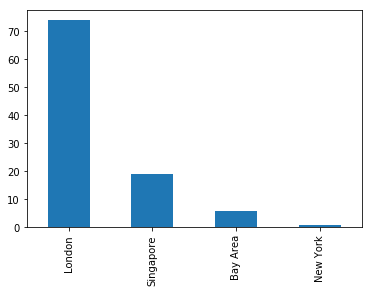

In [168]:
cohort_clean_df.projectLocation.value_counts().plot(kind="bar")

### Cohort

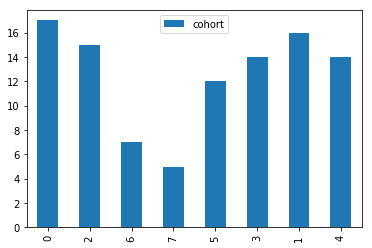

In [188]:
display_value_counts(cohort_clean_df.cohort)

### Sector

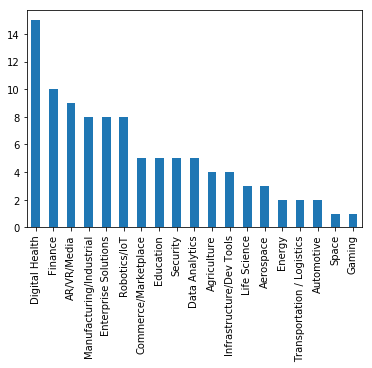

In [193]:
cohort_clean_df.sector.value_counts().plot(kind="bar")

### Founders

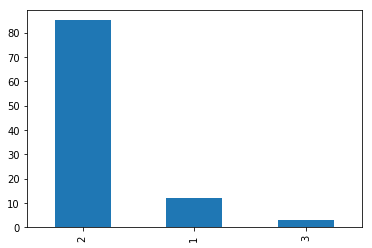

In [242]:
cohort_clean_df.number_of_founders.value_counts().plot(kind="bar")

### Big words

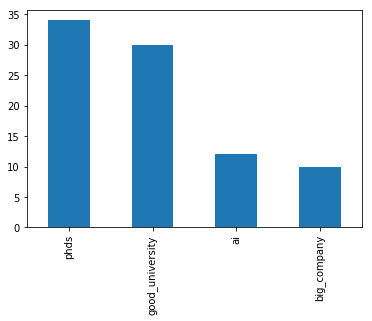

In [204]:
big_words = ['ai', 'phds', 'big_company', 'good_university']

cohort_clean_df[big_words].sum().sort_values(ascending=False).plot(kind="bar")

### Words

In [214]:
stop_words = set(stopwords.words('english'))

In [229]:
clean_concat_description = ' '.join(cohort_clean_df['cleaned_description'])    
wordcloud = WordCloud().generate(' '.join([w for w in clean_concat_description.split(' ') if w not in stop_words]))

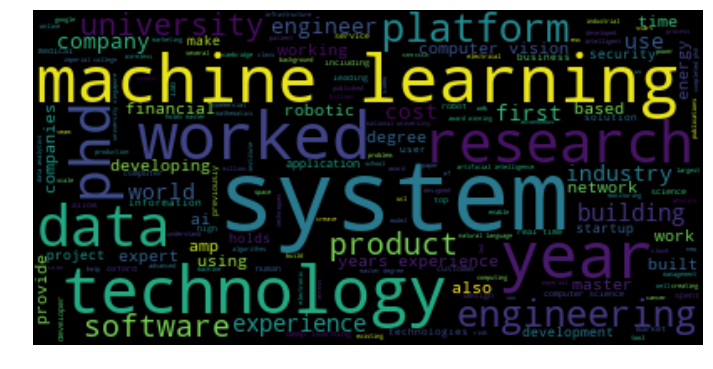

In [236]:
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()